In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [4]:
df = pd.read_csv("datasets/sales.csv")
label_enc = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns


In [6]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased',
       'satisfied '],
      dtype='object')

In [8]:
for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])
X = df.drop('satisfied ', axis=1) # replace &#39;target_column&#39; with your actual target column name
y = df['satisfied ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

# Initialize and train Random Forest Classifier


In [9]:
clf = RandomForestClassifier(oob_score=True,random_state=10)
clf.fit(X_train, y_train)
clf.oob_score
# Predictions
y_pred = clf.predict(X_test)



0.9


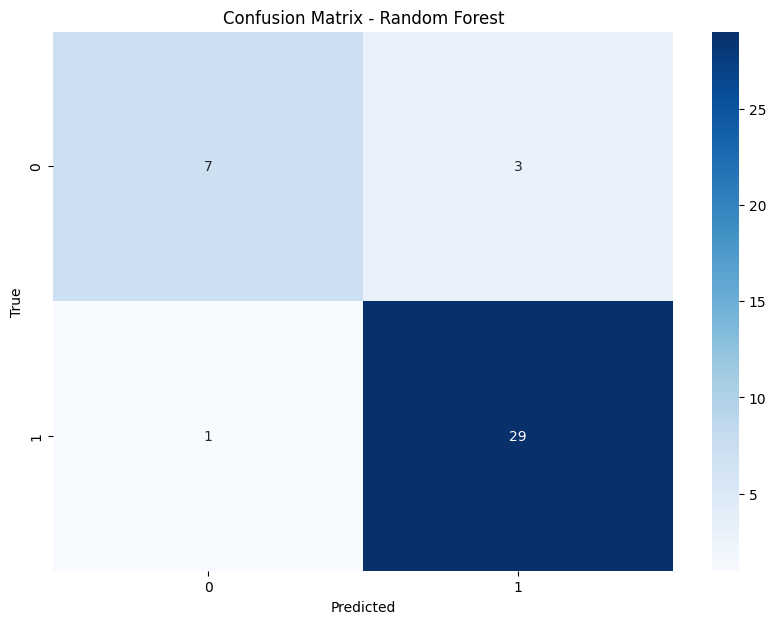

In [12]:
# Confusion matrix

conf_mat = confusion_matrix(y_test, y_pred)
Acc_score =accuracy_score(y_test,y_pred)
print(Acc_score)

plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()